In [36]:
using Revise
using BiMDPs

In [37]:
dir = "case010"

"case010"

In [47]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 20)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  include_measurement: Bool false
  measure_reward: Float64 0.0


## Plot rewards grid

In [67]:
BiMDPs.create_reward_field_evolution_gif(rgw; dir=dir)

"case010/reward_evolution.gif"

In [77]:
a = zeros(10,10,20,8);
b = ones(10,10,20,8);
a[:,:,1,:] == b[:,:,1,:]

false

In [104]:
BiMDPs.create_reward_field_evolution_imgs(rgw; dir=dir)

Creating figure for t = 1 to 10
Creating figure for t = 11
Creating figure for t = 12
Creating figure for t = 13
Creating figure for t = 14
Creating figure for t = 15
Creating figure for t = 16
Creating figure for t = 17
Creating figure for t = 18
Creating figure for t = 19
Creating figure for t = 20


## Do one instance of a solve with Fine-grained MDP

In [113]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

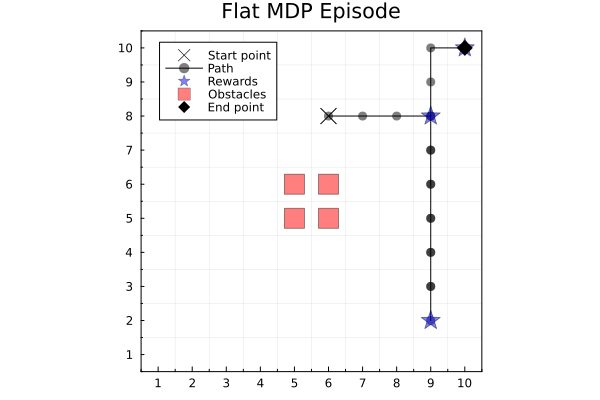

In [114]:
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)

## Do one instance of a solve with Bi-Level MDP

In [115]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=200, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

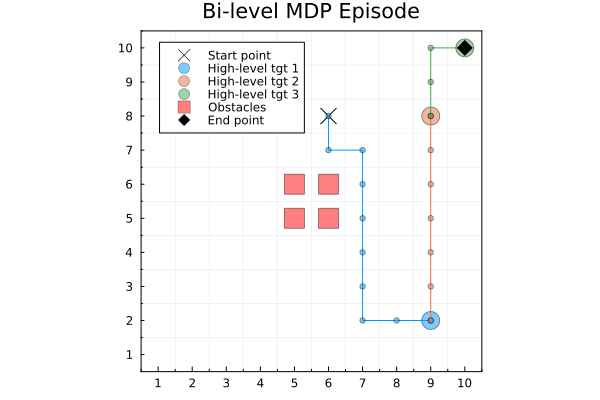

In [116]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, dir=dir)

## Compare optimality vs computation time


In [90]:
results = optimality_vs_compute(rgw, [("vi", [10,50], 100)])

Reward of vi after 100 simulations: μ = 59.30769995364406, σ = 21.04642965699374
Reward of vi after 100 simulations: μ = 63.32802570370537, σ = 18.908220331063124


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 1 entry:
  "vi" => ([1.15421, 2.08716], [59.3077, 63.328], [21.0464, 18.9082])

In [101]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 5, 10, 50, 100, 150, 300, 500, 1000], 100), ("vi", [1, 5, 8, 10, 15, 20, 50, 100, 150], 500), ("qlearning", [50,500,5000,50000], 500), ("sarsa", [50,500,5000,50000], 500)])

Reward of bl_vi after 100 simulations: μ = -4.3679553262553945, σ = 19.16102811586088
Reward of bl_vi after 100 simulations: μ = 20.969386575763806, σ = 34.3425763216769
Reward of bl_vi after 100 simulations: μ = 59.633962821644474, σ = 18.87234805558412
Reward of bl_vi after 100 simulations: μ = 64.18466944400546, σ = 13.902118462578294
Reward of bl_vi after 100 simulations: μ = 61.62863436373048, σ = 15.825712191086934
Reward of bl_vi after 100 simulations: μ = 64.44853219940755, σ = 10.75355657155357
Reward of bl_vi after 100 simulations: μ = 63.42778323188165, σ = 12.643547827741463
Reward of bl_vi after 100 simulations: μ = 62.772920042597185, σ = 11.93751557825826
Reward of bl_vi after 100 simulations: μ = 63.65757834024739, σ = 12.91550857275434
Reward of vi after 500 simulations: μ = -0.4631314608065984, σ = 20.934039905059766
Reward of vi after 500 simulations: μ = 34.06263030678187, σ = 33.605296325061516
Reward of vi after 500 simulations: μ = 53.98213109652467, σ = 28.67159

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.101828, 0.448359, 0.64441, 0.816691, 1.20522, 1.59242, 1.6…
  "sarsa"     => ([0.0080073, 0.0385458, 0.41007, 3.91824], [-1.31939, 0.398816…
  "bl_vi"     => ([0.0976459, 0.342347, 0.40766, 0.495871, 0.487017, 0.499408, …
  "qlearning" => ([0.0075377, 0.0574272, 0.381867, 3.98034], [-3.04227, 3.10579…

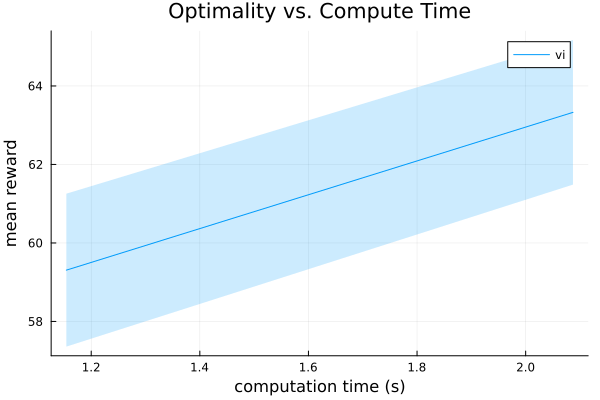

In [91]:
BiMDPs.plot_optimality_vs_compute(results, dir = dir)

## Test HL MDP

In [11]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [12]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [13]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [14]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [15]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [16]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [17]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)